## 6.1 Integração Numérica
A integração numérica é útil em situações nas quais não se conhece a expressão analítica da função a ser integrada ou quando a função primitiva é difícil de se obter. Uma forma de se calcular uma aproximação numérica para uma integral é por meio da integração do polinômio interpolador. Esse processo é conhecido como quadratura de Newton-Cotes e é desenvolvido por meio das sistemáticas conhecidas como *Regra dos Trapézios*, *Regra 1/3 de Simpson* e *Regra 3/8 de Simpson*. Antes de apresentarmos as fórmulas de Newton-Cotes, vamos relembrar um pouco do Cálculo. 

Considere uma função $f(x)$ contínua no intervalo $[a,b]$. Então, sabemos que

$$I=\int_a^b f(x)dx = F(b) - F(a)$$

em que a função $F(x)$ é a primitiva (ou antiderivada) de $f$, ou seja, é tal que $F'(x) = f(x)$.

Graficamente, considerando a função $f(x) \geq 0$, para todo $x \in [a,b]$ podemos interpretar a intergral $I=\int_a^b f(x)dx$ como a área entre a curva de $f$ e o eixo das abcissas:

<img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/6_INTEGRACAO_NUMERICA/imagens/integral.png" width="600">

Figura 6.1.1 - A integral definida como área sob o gráfico

#### 6.1.1 Soma de Riemann

A forma mais simples de obter um valor aproximado para uma integral definida é por meio da soma de Riemann. Para isto, divide-se o intervalo de integração $(a,b)$ em $n$ subintervalos e somam-se as áreas dos retângulos definidos em cada subintervalo. A largura de cada retângulo será dado por $h=\frac{x_n-x_0}{n}$ e a altura será dada por $f(x)$ para algum $x$ dentro do subintervalo $[x_i,x_{i+1}]$, com $i=0,1,...,n$. Uma escolha natural para o valor de $x$ é um dos extremos do intervalo, o extremo esquerdo $x_i$ ("pela esquerda") ou o extremo direito $x_{i+1}$ ("pela direita"):

<div style="display: flex; align-items: center;">
  <div style="flex: 1; text-align: center;">
    <img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/6_INTEGRACAO_NUMERICA/imagens/RiemannLeft.png">
  </div>
  <div style="flex: 1; text-align: center;">
    <img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/6_INTEGRACAO_NUMERICA/imagens/RiemannRight.png">
  </div>
</div>
    
Figura 6.1.2 - Somas de Riemann "pela direita" e "pela esquerda"

Claramente podemos aumentar a acurácia da aproximação obtida aumentando o número de subintervalos. A _regra do ponto médio_ considera a altura do retângulo definida em cada subintervalo como sendo o valor da função no ponto médio entre $x_i$ e $x_{i+1}$:

$$\int_a^b f(x)dx \approx \sum_{i = 0}^{n-1} hf\left(\frac{x_i+x_{i+1}}{2} \right)$$


**Exemplo 6.1.1:** Nesse exemplo vamos calcular a integral $\int_{0.1}^{0.8} x^2ln(x)dx$ usando aproximações da soma de Riemann pela esquerda, pela direita e pela regra do ponto médio, e comparar os resultados. Então vamos comparar com a solução exata 
($\approx -0.0940934155044049$).

In [1]:
from math import log

In [2]:
F = lambda x: x**3*log(x)/3 - x**3/9
I = F(0.8)-F(0.1)
print(I)

-0.0940934155044049


Aproximado pela soma de Riemann com 7 subintervalos, ou seja, $h = 0.1$

In [3]:
import numpy as np
xi = np.linspace(0.1, 0.8, 8)
h = xi[1]-xi[0]
print ("h=",h)

h= 0.1


In [4]:
f = lambda x: x**2*np.log(x)

In [5]:
Ie = h*np.sum(f(xi[0:-1]))
print("Ie=",Ie, "Erro=",abs(I-Ie))

Ie= -0.08743221791422254 Erro= 0.006661197590182369


In [6]:
Id = h*np.sum(f(xi[1:]))
print("Id=",Id, "Erro=",abs(I-Id))

Id= -0.09941082010533792 Erro= 0.0053174046009330095


In [7]:
Im = h*np.sum(f((xi[0:-1]+xi[1:])/2))
print("Im=",Im, "Erro=",abs(I-Im))

Im= -0.09443022564968762 Erro= 0.00033681014528270936


É possivel notar que a regra do ponto médio forneceu a melhor aproximação.

De modo geral, os métodos numéricos para cálculo de integrais definidas consistem em aproximar a função $f(x)$ pelo polinômio interpolador $P(x)$ e integrar o polinômio. Os casos ilustrados acima são polinômios de grau zero, mas poderiamos utilizar polinômios de grau maior.

Assim, de forma geral temos:

$$ \int_{a}^{b} f(x) dx \approx \int_{x_0}^{x_n} P(x) dx $$


Na sequência serão apresentados três métodos para integração numérica baseados na integração do polinômio interpolador conhecidos como Regras de Newton-Cotes. São eles, a regra dos trapézios, a regra 1/3 de Simpson e a regra 3/8 de Simpson.

### 6.1.2 Soma dupla de Riemann

Considerando uma função $f$ de duas variáveis definida em um retângulo fechado
$$
R=[a, b] \times[c, d]=\left\{(x, y) \in \mathbb{R}^2 \mid a \leq x \leq b, c \leq y \leq d\right\}
$$

e supondo que $f(x, y) \geq 0$. O gráfico de $f$ é a superficie com equação $z=f(x, y)$. Seja $S$ o sólido que está acima da região $R$ e abaixo do gráfico de $f$, isto é,
$$
S=\left\{(x, y, z) \in \mathbb{R}^3 \mid 0 \leq z \leq f(x, y),(x, y) \in R\right\}
$$

então, o volume do sólido $S$ pode ser aproximado por

$$V \approx \sum_{i=1}^m \sum_{j=1}^n f\left(x_{i j}^*, y_{i j}^*\right) \Delta A$$

em que $\left(x_{i j}^*, y_{i j}^*\right)$ são *pontos de amostragem* sobre a superfíce e $f\left(x_{i j}^*, y_{i j}^*\right)\Delta A$ é o volume de uma caixa fina, ou "coluna", com base $R_{ij}$ de área $\Delta A = \Delta x \Delta y$ e altura $f\left(x_{i j}^*, y_{i j}^*\right)$.


A integral dupla de $f$ sobre o retângulo $R$ é definida como 
$$
\iint_R f(x, y) d A=\lim _{m, n \rightarrow \infty} \sum_{i=1}^m \sum_{j=1}^n f\left(x_{i j}^*, y_{i j}^*\right) \Delta A
$$
se esse limite existir.

A soma dupla de Riemann na qual o ponto de amostragem $\left(x_{i j}^*, y_{i j}^*\right)$ em $R_{i j}$ é tomado como o ponto
central $\left(\bar{x}_i, \bar{y}_j\right)$ de $R_{i j}$, é dada por:


$$
\iint_R f(x, y) d A \approx \sum_{i=1}^m \sum_{j=1}^n f\left(\bar{x}_i, \bar{y}_j\right) \Delta A
$$
onde $\bar{x}_i$ é o ponto médio de $\left[x_{i-1}, x_i\right]$ e $\bar{y}_j$ é o ponto médio de $\left[y_{j-1}, y_j\right]$.

**Teoria de Fubini:** Se $f$ for continua no retângulo

$$
R=\{(x, y) \mid a \leq x \leq b, c \leq y \leq d\}
$$

então,
$$
\iint_R f(x, y) d A=\int_a^b \int_c^d f(x, y) d y d x=\int_c^d \int_a^b f(x, y) dxdy
$$

<center>  <img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_II/refs/heads/main/imagens/integral_iterada.png" width="600">

<center> Figura 6.3.3: Integral iterada 

**Exemplo 6.1.2:** *(Integração dupla por soma de Riemann)* Vamos agora plotar o gráfico da função, estimar o volume do sólido usando somas de Riemann e comparar o resultado numérico com o valor exato de (48 unidades de volume).

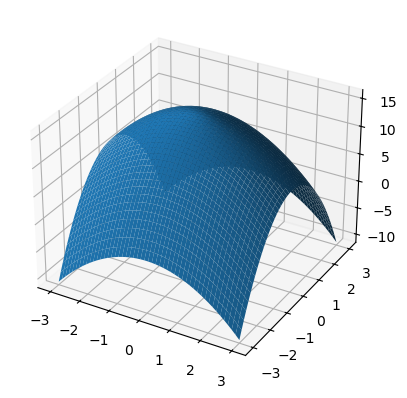

In [16]:
import numpy as np
import matplotlib.pyplot as plt

xi, yi = np.meshgrid(np.linspace(-3,3),np.linspace(-3,3))
zi = 16- xi**2 - 2*yi**2

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xi, yi, zi)
plt.show()

Dividindo a região $R=\{(x, y) \mid 0 \leq x \leq 2, 0 \leq y \leq 2\}$ em $4 \times 4$ quadrados de lados $dx=dy=0,5$ e fazendo a soma dos volumes das "caixas" com base  $R_{ij}$, $i,j=1,2,3,4$ de áreas $\Delta A = \Delta x \Delta y = 0,5^2=0,25$ e altura $f\left(x_{ij}^*, y_{ij}^*\right)$ em que $(x_{ij}^*, y_{ij})$ são os pontos do canto superior direito de cada quadrado $R_{ij}$, obtemos uma aproximação.  

In [17]:
dx=0.5; dy=0.5

# coordenadas dos pontos (x,y)
xi, yi = np.meshgrid(np.arange(dx,2+dx,dx), np.arange(dy,2+dy,dy))

# cálculo das alturas z = f(x,y)
f = lambda x,y: 16- x**2 - 2*y**2

# soma dupla de Riemann
V = np.sum(f(xi,yi))*dx*dy
print ('Soma dupla de Riemann:', V)

Soma dupla de Riemann: 41.5


Portanto a aproximação por soma de Riemann com 4 subintervalos na direção de $x$ e 4 subintervalos na direção de $y$ resultou em um volume aproximado de $41.5$, ou seja, um resultado com um erro relativo $\epsilon = 0.135417$, ou seja, na ordem de $13.5\%$.

A seguir é mostrada ima figura representando a superfície e a aproximação da integral por soma de Riemann.

<center> <img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_II/refs/heads/main/imagens/riemann.png">

<center>  Figura 3: Aproximação por soma de Riemann com 4 subintervalos

Quanto maior é o número de divisões da região $R$ melhor será a aproximação, como podemos ver na imagem abaixo:

<center><img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_II/refs/heads/main/imagens/aproximacoes_volumes.png" width="800">

<center> Figura 4: Aproximação do volume com diferentes discretizações da região R (Ver ANEXO II)

Para obter a aproximação pela regra do ponto médio, podemos fazer:

In [18]:
V = np.sum(f(xi-dx/2,yi-dy/2))*dx*dy
print ('Pela regra do ponto médio: V=', V)

Pela regra do ponto médio: V= 48.25


### Exercícios:
Fonte: [Stewart (2022, v 1)](https://integrada.minhabiblioteca.com.br/reader/books/9786555584097/pageid/386)

**1.** (a) Estime a área sob o gráfico $f(x)=1 / x$ de $x=1$ até $x=2$ usando oito retângulos aproximantes e extremidades direitas. Esboce o gráfico e os retângulos. Sua estimativa é uma subestimativa ou uma superestimativa?
(b) Repita a parte (a) usando extremidades esquerdas.

**2.** (a) Estime a área sob o gráfico de $f(x)=\operatorname{sen} x$ de $x=0$ até $x=$ $\pi / 2$ usando oito retângulos aproximantes e extremidades direitas. Esboce o gráfico e os retângulos. Sua estimativa é uma subestimativa ou uma superestimativa?
(b) Repita a parte (a) usando extremidades esquerdas.

**3.** (a) Estime a área sob o gráfico $f(x)=1+x^2$ de $x=-1$ até $x=2$ usando quatro retângulos aproximantes e extremidades direitas. Então, aperfeiçoe sua estimativa utilizando oito retângulos aproximantes. Esboce a curva e os retângulos aproximantes.
(b) Repita a parte (a) usando extremidades esquerdas.
(c) Repita a parte (a) empregando pontos médios.
(d) A partir de seus esboços das partes (a), (b) e (c), qual parece ser a estimativa mais precisa?

**4.**(a) Faça o gráfico da função

$$
f(x)=e^{x-x^2} \quad 0 \leq x \leq 2
$$

(b) Estime a área sob o gráfico de $f$ usando quatro retângulos aproximantes e tomando como pontos amostrais (i) as extremidades direitas e (ii) os pontos médios. Em cada caso, esboce a curva e os retângulos.
(c) Aperfeiçoe suas estimativas da parte (b) usando oito retângulos.

(Fonte: [Stewart (2022, v2)](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/456))

**5.** (a) Estime o volume do sólido que está abaixo da superfície $z=x y$ e acima do retângulo
$$
R=\{(x, y) \mid 0 \leq x \leq 6,0 \leq y \leq 4\}
$$

Utilize a soma de Riemann com $m=6, n=4$ e tome como ponto de amostragem o canto superior direito de cada sub-retângulo.

(b) Use a Regra do Ponto Médio para estimar o volume do sólido da parte (a).

**6.** Se $R=[0,4] \times[-1,2]$, use a soma de Riemann com $m=4, n=6$ para estimar o valor de $\iint_R\left(1-x y^2\right) d A$. Tome os pontos de amostragem como (a) os cantos inferiores direitos e (b) como os cantos superiores esquerdos dos retângulos.

**7.** (a) Use uma soma de Riemann com $m=n=8$ para estimar o valor de $\iint_R x e^{-x y} d A$, onde $R=[0,2] \times[0,1]$. Tome os pontos de amostragem como os cantos superiores direitos.

(b) Use a Regra do Ponto Médio para dar uma estimativa da integral do item (a).

**8.** (a) Estime o volume do sólido que está abaixo da superfície $z=1+x^2+3 y$ e acima do retângulo $R=[1,2] \times[0,3]$. Use a soma de Riemann com $m=n=8$ e escolha os pontos de amostragem como os cantos inferiores esquerdos.

(b) Use a Regra do Ponto Médio para estimar o volume do item (a).